### Edgar Moises Hernandez-Gonzalez
#### 15/11/19-19/11/19
#### Clasificar RAW con CNN-1D + LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPool1D, Flatten, LSTM, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report

In [2]:
x_train = pd.read_csv("MI-EEG-A01T.csv", header=None)
x_test = pd.read_csv("MI-EEG-A01E.csv", header=None)
y_train = pd.read_csv("EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("EtiquetasA01E.csv", header=None)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22000)
(288, 22000)
(288, 1)
(288, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [6]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 1, 1000, 22))
x_test = x_test.reshape((n_samples_test, 1, 1000, 22))

print(x_train.shape)
print(x_test.shape)

(288, 1, 1000, 22)
(288, 1, 1000, 22)


In [68]:
model = Sequential()
model.add(TimeDistributed(Conv1D(8, 11, activation='relu'), input_shape=(None,1000,22)))
model.add(TimeDistributed(MaxPool1D(2)))
model.add(TimeDistributed(Conv1D(16, 11, activation='relu')))
model.add(TimeDistributed(MaxPool1D(2)))
model.add(TimeDistributed(Conv1D(16, 11, activation='relu')))
model.add(TimeDistributed(MaxPool1D(2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(16))
#model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_65 (TimeDis (None, None, 986, 8)      2648      
_________________________________________________________________
time_distributed_66 (TimeDis (None, None, 493, 8)      0         
_________________________________________________________________
time_distributed_67 (TimeDis (None, None, 479, 16)     1936      
_________________________________________________________________
time_distributed_68 (TimeDis (None, None, 239, 16)     0         
_________________________________________________________________
time_distributed_69 (TimeDis (None, None, 225, 16)     3856      
_________________________________________________________________
time_distributed_70 (TimeDis (None, None, 112, 16)     0         
_________________________________________________________________
time_distributed_71 (TimeDis (None, None, 1792)        0         
__________

In [70]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [71]:
history = model.fit(x_train, y_train, epochs=20, batch_size=18, validation_data=(x_test, y_test))

Train on 288 samples, validate on 288 samples
Epoch 1/20
288/288 [==============================] - 2s 6ms/sample - loss: 1.4010 - acc: 0.2292 - val_loss: 1.3928 - val_acc: 0.2500
Epoch 2/20
288/288 [==============================] - 0s 2ms/sample - loss: 1.3694 - acc: 0.3854 - val_loss: 1.3875 - val_acc: 0.2708
Epoch 3/20
288/288 [==============================] - 0s 2ms/sample - loss: 1.3349 - acc: 0.3889 - val_loss: 1.3949 - val_acc: 0.3125
Epoch 4/20
288/288 [==============================] - 0s 2ms/sample - loss: 1.2655 - acc: 0.5278 - val_loss: 1.3925 - val_acc: 0.3056
Epoch 5/20
288/288 [==============================] - 0s 2ms/sample - loss: 1.1933 - acc: 0.6250 - val_loss: 1.4022 - val_acc: 0.2743
Epoch 6/20
288/288 [==============================] - 0s 2ms/sample - loss: 1.1167 - acc: 0.7257 - val_loss: 1.3882 - val_acc: 0.3125
Epoch 7/20
288/288 [==============================] - 0s 2ms/sample - loss: 1.0378 - acc: 0.7743 - val_loss: 1.4164 - val_acc: 0.3090
Epoch 8/20
288/2

In [57]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

288/288 [==============================] - 0s 701us/sample - loss: 1.6988 - acc: 0.3785
Test loss: 1.6987858878241644
Test accuracy: 0.3784722


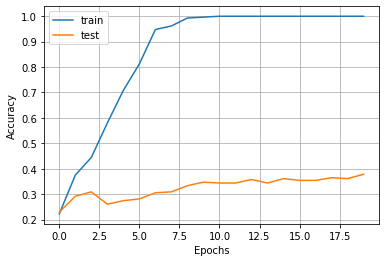

In [58]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

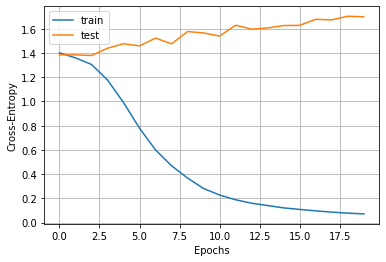

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()

In [60]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [61]:
kappa = cohen_kappa_score(y_test, y_pred)
print(kappa)

0.17129629629629628


In [62]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[30 26 11  5]
 [16 32  8 16]
 [11 16 23 22]
 [17 22  9 24]]


In [63]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.41      0.42      0.41        72
           1       0.33      0.44      0.38        72
           2       0.45      0.32      0.37        72
           3       0.36      0.33      0.35        72

   micro avg       0.38      0.38      0.38       288
   macro avg       0.39      0.38      0.38       288
weighted avg       0.39      0.38      0.38       288

